In [16]:
from from_result import *
from from_wave import *

mass = 27535.24841189485
energy_kelvin = 3700
energy = energy_kelvin * 3.1668105e-6
path = "../data"
save_path = "../plots"

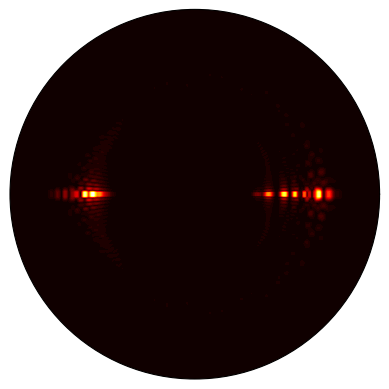

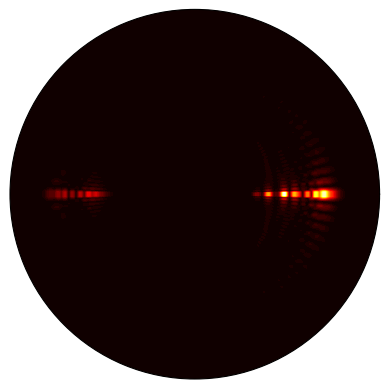

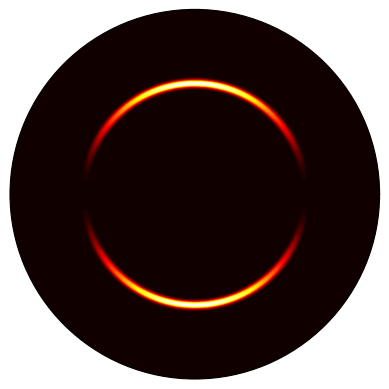

In [17]:
anim = wave_animation("force_field_0_0")
anim.save(f'{save_path}/force_field_0_0_wave_animation.gif', writer="pillow", fps=30)

anim = wave_animation("force_field_1_0")
anim.save(f'{save_path}/force_field_1_0_wave_animation.gif', writer="pillow", fps=30)

anim = wave_animation("force_field_1_1")
anim.save(f'{save_path}/force_field_1_1_wave_animation.gif', writer="pillow", fps=30)

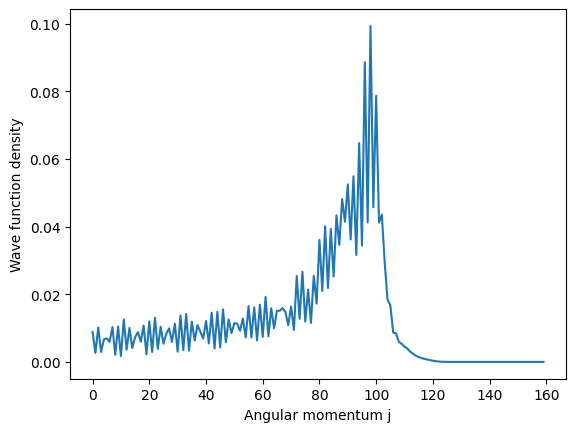

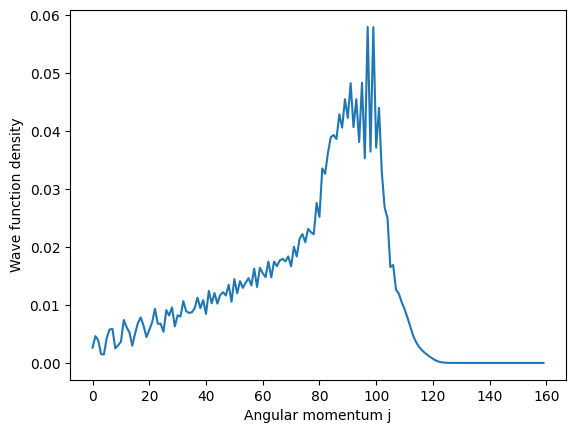

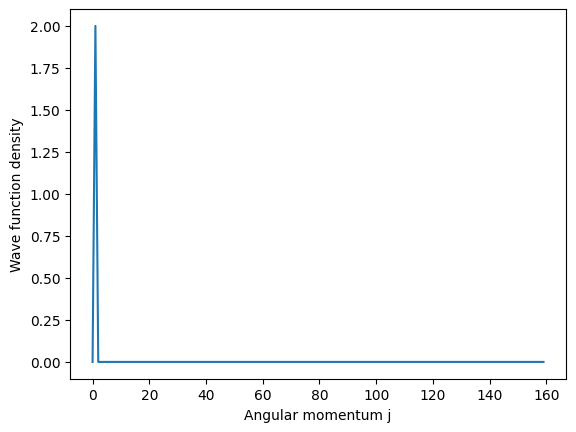

In [23]:
anim = angular_animation("force_field_0_0")
anim.save(f'{save_path}/force_field_0_0_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("force_field_1_0")
anim.save(f'{save_path}/force_field_1_0_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("force_field_1_1")
anim.save(f'{save_path}/force_field_1_1_angular_animation.gif', writer="pillow", fps=30)

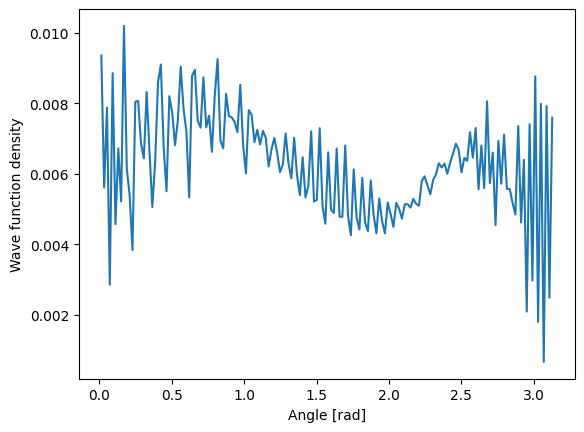

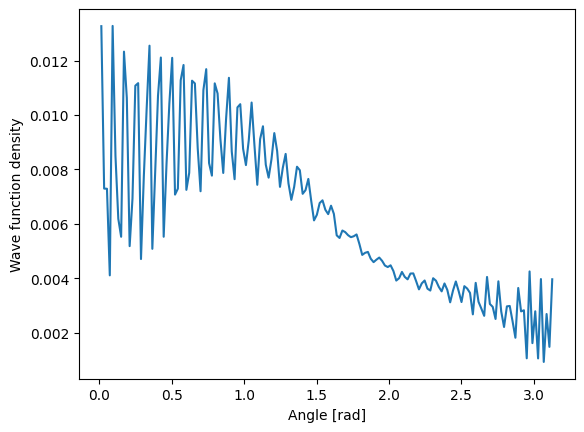

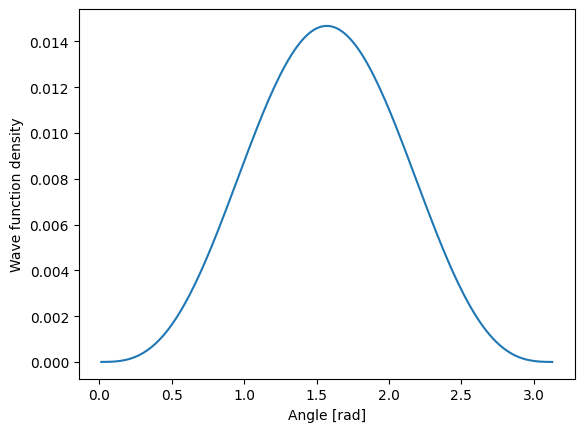

In [19]:
anim = polar_animation("force_field_0_0")
anim.save(f'{save_path}/force_field_0_0_polar_animation.gif', writer="pillow", fps=30)

anim = polar_animation("force_field_1_0")
anim.save(f'{save_path}/force_field_1_0_polar_animation.gif', writer="pillow", fps=30)

anim = polar_animation("force_field_1_1")
anim.save(f'{save_path}/force_field_1_1_polar_animation.gif', writer="pillow", fps=30)

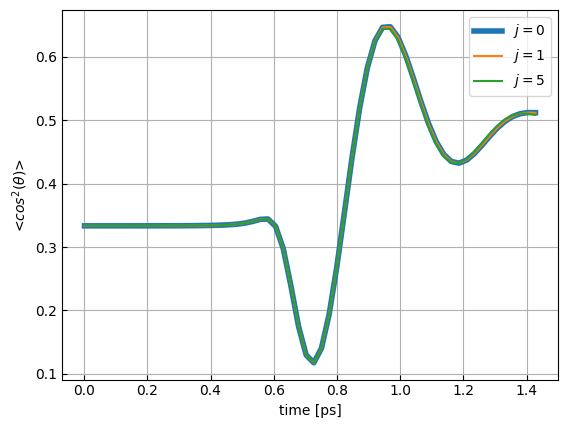

In [25]:
fig, ax = alignements("force_field", [0, 1, 5])
ax.lines[0].set_linewidth(4)
ax.legend()

Reaction rate for j = 0, Ω = 0

In [8]:
j_init = 0
omega_init = 0

losses = read_losses(f"{path}/ff_losses_{energy_kelvin}_{j_init}_{omega_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_00 = xpi_react_rate
bsigma_react_rate_00 = bsigma_react_rate

print("XPi reaction rate: ", bsigma_react_rate_00)
print("A + B reaction rate: ", bsigma_react_rate_00)

XPi reaction rate:  1.80136761798904e-10
A + B reaction rate:  1.80136761798904e-10


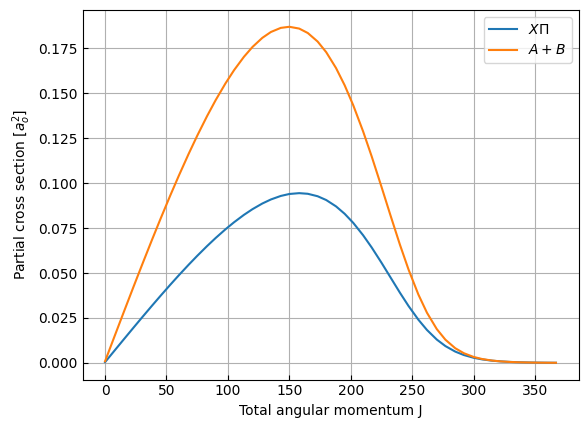

In [9]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label="$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

Reaction rate for j = 1, Ω = 0

In [10]:
j_init = 1
omega_init = 0

losses = read_losses(f"{path}/ff_losses_{energy_kelvin}_{j_init}_{omega_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_10 = xpi_react_rate
bsigma_react_rate_10 = bsigma_react_rate

print("XPi reaction rate: ", bsigma_react_rate_10)
print("A + B reaction rate: ", bsigma_react_rate_10)

XPi reaction rate:  9.204812946298551e-11
A + B reaction rate:  9.204812946298551e-11


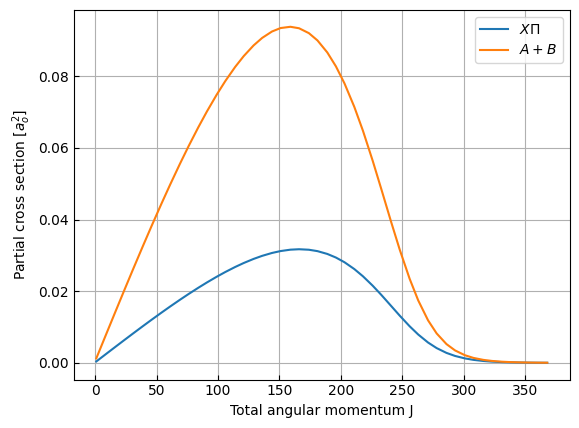

In [11]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label="$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

Reaction rate for j = 1, Ω = 1

In [12]:
j_init = 1
omega_init = 1

losses = read_losses(f"{path}/ff_losses_{energy_kelvin}_{j_init}_{omega_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_11 = xpi_react_rate
bsigma_react_rate_11 = bsigma_react_rate

print("XPi reaction rate: ", bsigma_react_rate_11)
print("A + B reaction rate: ", bsigma_react_rate_11)

XPi reaction rate:  8.807983362032433e-11
A + B reaction rate:  8.807983362032433e-11


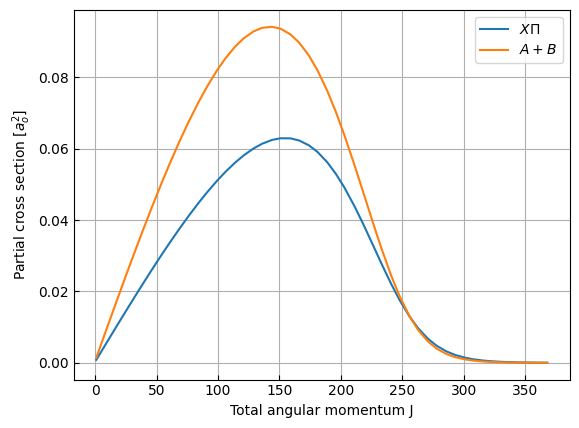

In [13]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label="$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

Full reaction rates

In [14]:
xpi_react_rate0 = xpi_react_rate_00
bsigma_react_rate0 = bsigma_react_rate_00

xpi_react_rate1 = xpi_react_rate_10 + xpi_react_rate_11
bsigma_react_rate1 = bsigma_react_rate_10 + bsigma_react_rate_11

print(f"Total reaction rate for j=0:")
print(f"xpi: {xpi_react_rate0}")
print(f"A+B: {bsigma_react_rate0}")
print()
print(f"Total reaction rate for j=1:")
print(f"xpi: {xpi_react_rate1}")
print(f"A+B: {bsigma_react_rate1}")
print()
print(f"Ratios j=1 to j=0:")
print(f"xpi: {xpi_react_rate1/xpi_react_rate0}")
print(f"A+B: {bsigma_react_rate1/bsigma_react_rate0}")

Total reaction rate for j=0:
xpi: 9.194180070393683e-11
A+B: 1.80136761798904e-10

Total reaction rate for j=1:
xpi: 9.193817349046549e-11
A+B: 1.8012796308330983e-10

Ratios j=1 to j=0:
xpi: 0.9999605488097518
A+B: 0.9999511553582605


# Potential changing

## dipole scaling

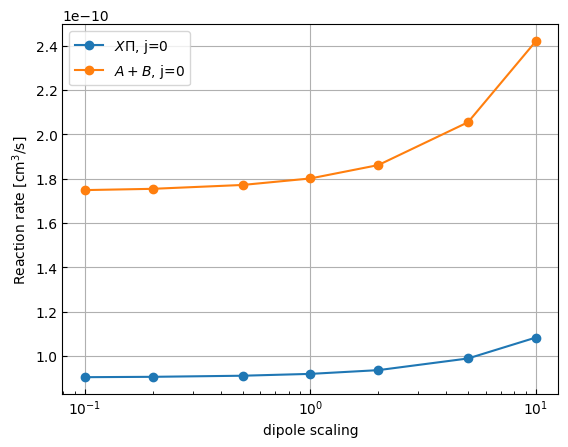

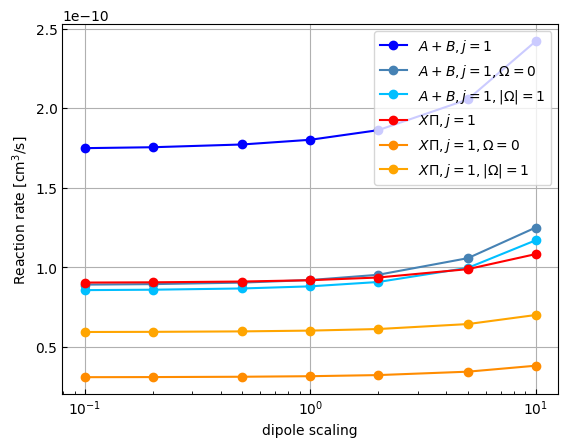

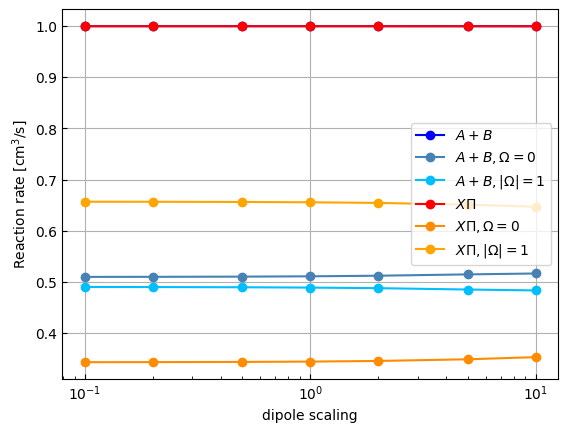

In [14]:
scalings = [0.1, 0.2, 0.5, 1, 2, 5, 10]

xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11 = get_reaction_rate_dependence("dipole_scaling", scalings, identity=None)

fig, ax = plot_reaction_rate_dependence_0("dipole scaling", scalings, xpi0, bsigma0)
ax.set_xscale("log")
fig, ax = plot_reaction_rate_dependence_1("dipole scaling", scalings, xpi10, xpi11, bsigma10, bsigma11)
ax.set_xscale("log")
fig, ax = plot_ratio_dependence("dipole scaling", scalings, xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11)
ax.set_xscale("log")